In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
#from tensorflow.keras.models import load_model

In [3]:
#model=load_model("EngTextAll0.4364.keras")
model = models.Sequential([
    layers.Conv2D(8, (16, 16), activation='softmax', input_shape=(121,72,1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(8, (10, 10), activation='sigmoid'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (8, 8), activation='tanh'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),#Flatten to Flat
    layers.Dense(51)#51D OutPut
])#Normal:(sharpData/(2**64)).astype("float16") with epoch 120 => accuracy :0.99999999999999999
#Print Model Net struction
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 106, 57, 8)          │           2,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 53, 28, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 44, 19, 8)           │           6,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 22, 9, 8)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 15, 2, 16)           │           8,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 7, 1, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 112)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 51)                  │           5,763 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,435 (87.64 KB)

 Trainable params: 22,435 (87.64 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [6]:
#data could be downloaded from published
sharpdata=np.load("page1.npy")      #1.48GB
label=np.load("page1_labels.npy")   #35.4KB

In [ ]:
#Piece Train (if you dont have enough hardware)
#for i in range(3):
#    model.fit(sharpdata[(i%3)*10000:(i%3+1)*10000], label[(i%3)*10000:(i%3+1)*10000], epochs=30)

In [7]:
model.fit(sharpdata, label, epochs=30)

Epoch 1/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.0496 - loss: 3.6429
Epoch 2/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.0628 - loss: 3.5209
Epoch 3/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.0763 - loss: 3.3107
Epoch 4/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.0815 - loss: 3.1939
Epoch 5/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - accuracy: 0.0852 - loss: 3.1650
Epoch 6/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.0958 - loss: 3.1330
Epoch 7/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.0946 - loss: 3.0954
Epoch 8/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.0856 - loss: 3.0924
Epoch 9/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.0977 - loss: 3.0721
Epoch 10/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.1045 - loss: 3.0399
Epoch 11/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.1039 - loss: 3.0121
Epoch 12/30
219/219 ━━━━━━━━━━━━━━━━━━━

In [8]:
model.fit(sharpdata, label, epochs=40)

Epoch 1/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.1682 - loss: 2.7721
Epoch 2/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.1806 - loss: 2.7769
Epoch 3/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.1731 - loss: 2.7891
Epoch 4/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.1834 - loss: 2.7555
Epoch 5/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.1864 - loss: 2.7484
Epoch 6/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.1805 - loss: 2.7280
Epoch 7/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.1891 - loss: 2.7281
Epoch 8/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.1906 - loss: 2.7083
Epoch 9/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.2014 - loss: 2.6841
Epoch 10/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.2055 - loss: 2.6924
Epoch 11/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.2059 - loss: 2.6625
Epoch 12/40
219/219 ━━━━━━━━━━━━━━━━━━━

In [9]:
testdata=np.load("page1Piece1.npy")
testlabels=np.load("page1_labelsPiece1.npy")

In [10]:
h=model.fit(sharpdata, label, epochs=40,validation_data=(testdata, testlabels))

Epoch 1/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.3173 - loss: 2.2942 - val_accuracy: 0.0910 - val_loss: 3.2858
Epoch 2/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.3137 - loss: 2.3010 - val_accuracy: 0.0860 - val_loss: 3.2983
Epoch 3/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.3287 - loss: 2.2813 - val_accuracy: 0.0770 - val_loss: 3.3443
Epoch 4/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.3228 - loss: 2.2886 - val_accuracy: 0.0810 - val_loss: 3.3289
Epoch 5/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.3212 - loss: 2.2770 - val_accuracy: 0.0760 - val_loss: 3.3458
Epoch 6/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.3322 - loss: 2.2656 - val_accuracy: 0.0870 - val_loss: 3.3195
Epoch 7/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.3306 - loss: 2.2401 - val_accuracy: 0.0910 - val_loss: 3.3474
Epoch 8/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.3343 - loss: 2.2393 - val_accu

In [11]:
import matplotlib.pyplot as plt

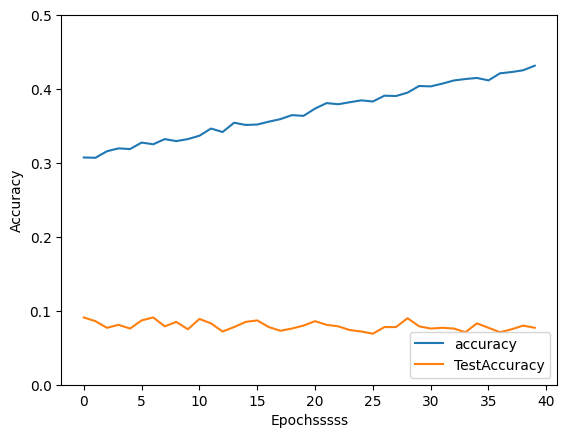

In [14]:
plt.plot(h.history['accuracy'], label='accuracy')
plt.plot(h.history['val_accuracy'], label = 'TestAccuracy')
plt.xlabel('Epochsssss')
plt.ylabel('Accuracy')
plt.ylim([0, 0.5])
plt.legend(loc='lower right')

In [15]:
model.fit(sharpdata, label, epochs=60)

Epoch 1/60
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.4372 - loss: 1.8998
Epoch 2/60
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.4374 - loss: 1.8838
Epoch 3/60
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.4447 - loss: 1.8762
Epoch 4/60
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.4409 - loss: 1.8688
Epoch 5/60
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.4550 - loss: 1.8362
Epoch 6/60
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.4495 - loss: 1.8477
Epoch 7/60
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.4664 - loss: 1.8208
Epoch 8/60
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.4697 - loss: 1.8203
Epoch 9/60
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.4600 - loss: 1.8182
Epoch 10/60
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.4650 - loss: 1.8104
Epoch 11/60
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.4716 - loss: 1.7871
Epoch 12/60
219/219 ━━━━━━━━━━━━━━━━━━━━ 

In [16]:
h2=model.fit(sharpdata, label, epochs=40,validation_data=(testdata, testlabels))

Epoch 1/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.6126 - loss: 1.3257 - val_accuracy: 0.0810 - val_loss: 4.5979
Epoch 2/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.6056 - loss: 1.3556 - val_accuracy: 0.0730 - val_loss: 4.6164
Epoch 3/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.6250 - loss: 1.3244 - val_accuracy: 0.0740 - val_loss: 4.6418
Epoch 4/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.6245 - loss: 1.3165 - val_accuracy: 0.0730 - val_loss: 4.6885
Epoch 5/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.6218 - loss: 1.3094 - val_accuracy: 0.0680 - val_loss: 4.6959
Epoch 6/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.6214 - loss: 1.2813 - val_accuracy: 0.0720 - val_loss: 4.6588
Epoch 7/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6275 - loss: 1.2996 - val_accuracy: 0.0800 - val_loss: 4.7113
Epoch 8/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6311 - loss: 1.2943 - val_accu

In [18]:
ind= np.arange(len(sharpdata))
np.random.shuffle(ind)
sharpdata2=sharpdata[ind]
label2=label[ind]

In [19]:
ind

array([6244, 5740, 2808, ..., 6346, 5012, 2225])

In [20]:
h2=model.fit(sharpdata2, label2, epochs=20,validation_data=(testdata, testlabels))

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.6970 - loss: 1.0508 - val_accuracy: 0.0660 - val_loss: 5.2967
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - accuracy: 0.7084 - loss: 1.0377 - val_accuracy: 0.0640 - val_loss: 5.3820
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.7142 - loss: 1.0169 - val_accuracy: 0.0750 - val_loss: 5.3892
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.7102 - loss: 1.0268 - val_accuracy: 0.0790 - val_loss: 5.3366
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.7118 - loss: 1.0204 - val_accuracy: 0.0670 - val_loss: 5.4021
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.7291 - loss: 1.0004 - val_accuracy: 0.0700 - val_loss: 5.4095
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.7345 - loss: 0.9750 - val_accuracy: 0.0620 - val_loss: 5.4539
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.7323 - loss: 0.9642 - val_accu

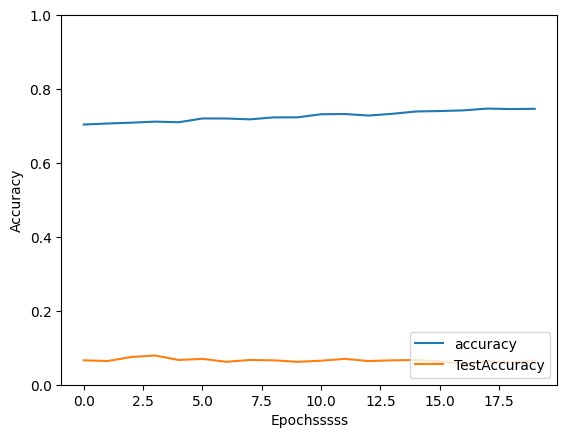

In [21]:
plt.plot(h2.history['accuracy'], label='accuracy')
plt.plot(h2.history['val_accuracy'], label = 'TestAccuracy')
plt.xlabel('Epochsssss')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [22]:
model.fit(testdata, testlabels, epochs=80)

Epoch 1/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.0733 - loss: 5.6747
Epoch 2/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.0956 - loss: 4.5444
Epoch 3/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1104 - loss: 4.1461
Epoch 4/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1187 - loss: 3.8073
Epoch 5/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.1235 - loss: 3.6385
Epoch 6/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1301 - loss: 3.4390
Epoch 7/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1468 - loss: 3.3861
Epoch 8/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.1624 - loss: 3.2174
Epoch 9/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.1967 - loss: 3.0308
Epoch 10/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.1623 - loss: 3.0517
Epoch 11/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.2206 - loss: 2.7849
Epoch 12/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy:

In [23]:
testdata2=np.load("page1Piece2.npy")
testlabels2=np.load("page1_labelsPiece2.npy")

In [24]:
h2=model.fit(testdata2, testlabels2, epochs=60,validation_data=(testdata, testlabels))

Epoch 1/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.0774 - loss: 4.6358 - val_accuracy: 0.1810 - val_loss: 2.9446
Epoch 2/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.1060 - loss: 3.5598 - val_accuracy: 0.1310 - val_loss: 3.2490
Epoch 3/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.0781 - loss: 3.3555 - val_accuracy: 0.1200 - val_loss: 3.3058
Epoch 4/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.1062 - loss: 3.0668 - val_accuracy: 0.1240 - val_loss: 3.3082
Epoch 5/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.0986 - loss: 3.0539 - val_accuracy: 0.1340 - val_loss: 3.2800
Epoch 6/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.1264 - loss: 2.9023 - val_accuracy: 0.1150 - val_loss: 3.2934
Epoch 7/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.1359 - loss: 2.9076 - val_accuracy: 0.1140 - val_loss: 3.2937
Epoch 8/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.1497 - loss: 2.8441 - val_accuracy: 0.1160 - v

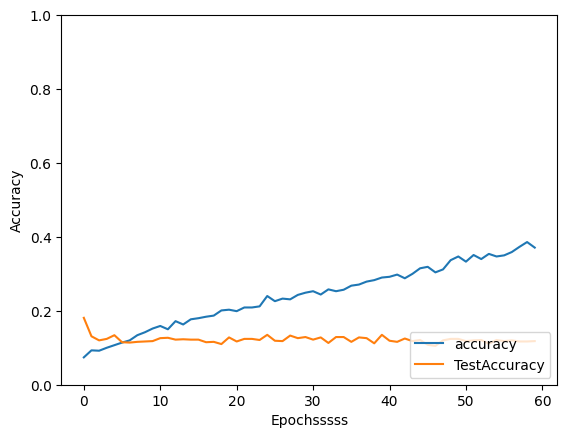

In [25]:
plt.plot(h2.history['accuracy'], label='accuracy')
plt.plot(h2.history['val_accuracy'], label = 'TestAccuracy')
plt.xlabel('Epochsssss')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [27]:
d=np.concatenate([sharpdata,testdata,testdata2])
l=np.concatenate([label,testlabels,testlabels2])
d.shape

(9000, 121, 72)

In [29]:
model.fit(d, l, epochs=30)

Epoch 1/30
282/282 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.1369 - loss: 3.2287
Epoch 2/30
282/282 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - accuracy: 0.1669 - loss: 3.0503
Epoch 3/30
282/282 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - accuracy: 0.1891 - loss: 2.8918
Epoch 4/30
282/282 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.2184 - loss: 2.7516
Epoch 5/30
282/282 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.2356 - loss: 2.6667
Epoch 6/30
282/282 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.2418 - loss: 2.5283
Epoch 7/30
282/282 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - accuracy: 0.2676 - loss: 2.4622
Epoch 8/30
282/282 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - accuracy: 0.2861 - loss: 2.4081
Epoch 9/30
282/282 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.3005 - loss: 2.3482
Epoch 10/30
282/282 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.3085 - loss: 2.2960
Epoch 11/30
282/282 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - accuracy: 0.3232 - loss: 2.2255
Epoch 12/30
282/282 ━━━━━━━━━━

In [30]:
model.save("KungKimBonAIPage1.keras")